<h3 style="text-align: center;"><b>«Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок »</b></h3>

In [1]:
import math
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

**Задача 1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с:**   
- точностью ∆ = 3   
- дисперсией σ^2 = 225   
- уровнем доверия β = 0.95. 

In [2]:
accuracy = 3
sigma = math.sqrt(225)
z = 1.960

print(f'Минимально необходимый объем выборки для построения\
интервальной оценки среднего {round(((z * sigma) / accuracy) ** 2)}.')

Минимально необходимый объем выборки для построенияинтервальной оценки среднего 96.


**Задача 2. Пусть для выборки объема n = 25 вычислено среднее x¯ = 130. Из предыдущих исследований известно стандартное отклонение σ = 12. Постройте 98% доверительный интервал для среднего значения.** 


In [3]:
n = 25
X = 130
sigma = 12
t = 2.064

accurasy = (sigma / math.sqrt(n)) * t

X - accurasy, X, X + accurasy

(125.0464, 130, 134.9536)

**Задача 3. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001**

In [4]:
population_men = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

stats.ttest_ind(population_men, population_women)

Ttest_indResult(statistic=2.2334156799045077, pvalue=0.025521565125781628)

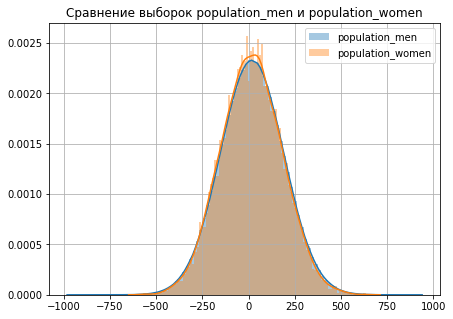

In [20]:
plt.figure(figsize=(7, 5))
sns.distplot(population_men, 100)
sns.distplot(population_women, 100)
plt.title('Сравнение выборок population_men и population_women')
plt.legend(['population_men', 'population_women'])
plt.grid()

**Вывод:** На основании полученного значения p-value, при **уровне значимости 0.001** у нас нет достаточно аргументов чтобы принять альтернативную гипотезу (H1). Так как **0.153 > 0.001** можно утверждать что наши выбрки не отличаются значительно, что также подтверждает построенная визуализация.

**Задача 4. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе:**
- стандартное отклонение = 150
- уровень доверия = 95%
- погрешность 50 рублей

In [6]:
accuracy = 50
sigma = 150
z = 1.960

print(f'Объем необходимой выборки для исследования среднего чека\
 за кофе в случайном городе {round(((z * sigma) / accuracy) ** 2)}.')

Объем необходимой выборки для исследования среднего чека за кофе в случайном городе 35.


**Задача 5.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении некоторого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05 ?**

**H0** - не умеет предсказывать   
**H1** - умеет предсказывать

In [7]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [8]:
oddsratio, pvalue = sp.stats.fisher_exact(observations)

pvalue

0.35417955365927367

**Вывод:** На основании полученых значений p-value нет оснований отклонить H0. Не достаточно оснований утверждать, что "Волшебник" умеет предсказывать погоду. 

**Задача 6. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки:**

In [9]:
numbers = [1, 5, 8, 9, 6, 7, 5, 6, 7, 8, 5, 6, 7, 0, 9, 8, 4, 6, 7, 9, 8, 6, 5, 7, 8, 9, 6, 7, 5, 8, 6, 7, 9, 5]

In [10]:
def mean_confidence_interval(data, confidence=0.90):
    n = len(data)
    m, se = np.mean(data), sp.stats.sem(data)
    h = se * sp.stats.t.ppf((1 + confidence) / 2, n)
    return m - h, m, m + h

- n - размер выборки
- m - матожидание
- se - стандартное отклонение
- h - перцентиль

In [11]:
print(mean_confidence_interval(numbers, 0.90))

(5.843062450077532, 6.4411764705882355, 7.039290491098939)


**Задача 7. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.**

In [12]:
data_1 = [4, 5, 8, 9, 6, 7, 5, 6, 7, 8, 5, 6, 7, 0, 9, 8, 4, 6, 7, 9, 8, 6, 5, 7, 8, 
          9, 6, 7, 5, 8, 6, 7, 9, 5, 10]

data_2 = [8, 5, 6, 7, 0, 1, 8, 4, 6, 7, 0, 2, 6, 5, 7, 5, 3, 5, 3, 5, 3, 5, 5, 8, 7, 
          6, 4, 5, 3, 5, 4, 6, 4, 5, 3, 2, 6, 4, 2, 6, 1, 0, 4, 3, 5, 4, 3, 4, 5, 4, 
          3, 4, 5, 4, 3, 4, 5, 3, 4, 4, 1, 2, 4, 3, 1, 2, 4, 3, 2, 1, 5, 3, 4, 6, 4, 
          5, 3, 2, 4, 5, 6, 4, 3, 1, 3, 5, 3, 4, 4, 4, 2, 5, 3]

**H0** - не принадлежит  
**H1** - принадлежит 

In [13]:
print(mean_confidence_interval(data_1, confidence=0.95))
print(mean_confidence_interval(data_2, confidence=0.95))

(5.96231523540854, 6.628571428571429, 7.294827621734318)
(3.601578660531681, 3.967741935483871, 4.333905210436061)


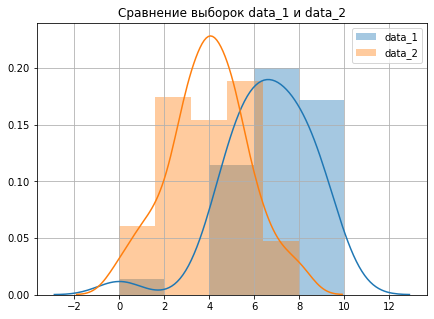

In [14]:
plt.figure(figsize=(7, 5))
sns.distplot(data_1, 5)
sns.distplot(data_2, 5)
plt.title('Сравнение выборок data_1 и data_2')
plt.legend(['data_1', 'data_2'])
plt.grid()

In [15]:
stats.ttest_ind(data_1 ,data_2)

Ttest_indResult(statistic=7.35744682757447, pvalue=2.1159475572725764e-11)

**Вывод.** На основании полученных результатов t-test-а мы не можем принять H0. Кроме того, на соновании построенных доверительных интервалов, описывающих матожидание генерельных совокупностей двух выборок, видно, что матожидания у двух генеральных совокупностях с 95% вероятностью лежат в разных интервалах. Также, оцениявая два распределения визуально, можно увидеть, что они отличаются. 

**Задача 8. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.** 

Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное,  Альтернативная гипотеза - распределение не нормальное.


Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

**Смотря какую альфу мы зададим изначально. Если это будет 0,05, то у нас не будет достаточно оснований чтобы принять Н0, а если, предположим альфа будет 0.01 то получим обратную ситуацию**

**Задача 9. Первая выборка — это пациенты, которых лечили препаратом А.  Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)** 

- а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

- b) При каком минимальном P-values различия были бы уже значимы? 

In [16]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A + stats.norm.rvs(scale=10,loc=-1.25,size=300)

In [17]:
stats.ttest_ind(A ,B)

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.740034005650458)

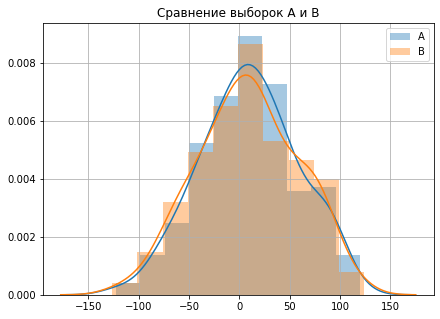

In [18]:
plt.figure(figsize=(7, 5))
sns.distplot(A, 10)
sns.distplot(B, 10)
plt.title('Сравнение выборок A и B')
plt.legend(['A', 'B'])
plt.grid()

**Вывод.** На основании полученного p-value (0.740) в ходе проведенного t-testa у нас нет основаниий отклонить H0. Различие между препаратом А и Б отсутствует, что также подтверждается построенной визуализацией.